# Model_Building

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ene_prod.csv")
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9463,17.10,49.69,1005.53,81.82,457.32
9464,24.73,65.34,1015.42,52.80,446.92
9465,30.44,56.24,1005.19,56.24,429.34
9466,23.00,66.05,1020.61,80.29,421.57


In [3]:
X = df.drop(['energy_production'],axis=1)
X

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9463,17.10,49.69,1005.53,81.82
9464,24.73,65.34,1015.42,52.80
9465,30.44,56.24,1005.19,56.24
9466,23.00,66.05,1020.61,80.29


In [4]:
Y = df.iloc[:,4:5]
Y

,energy_production
0,481.30
1,465.36
2,465.48
3,467.05
4,463.58
...,...
9463,457.32
9464,446.92
9465,429.34
9466,421.57


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7)

In [6]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6627, 4), (2841, 4), (6627, 1), (2841, 1))

# Models

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,Y_train)

LinearRegression()

In [8]:
LRTrain_pred = LR.predict(X_train)
LRTest_pred = LR.predict(X_test)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

LRTrain_R2 = r2_score(Y_train, LRTrain_pred)
LRTest_R2 = r2_score(Y_test, LRTest_pred)

LRTrain_mse = mean_squared_error(Y_train, LRTrain_pred)
LRTest_mse = mean_squared_error(Y_test, LRTest_pred)

LRTrain_rmse = mean_squared_error(Y_train, LRTrain_pred, squared=False)
LRTest_rmse = mean_squared_error(Y_test, LRTest_pred, squared=False)


print(f"Train_R2: {(LRTrain_R2).round(2)}\n Test_R2: {LRTest_R2.round(2)}\n")
print(f"Train_mse: {(LRTrain_mse).round(2)}\n Test_mse: {LRTest_mse.round(2)}\n")
print(f"Train_rmse: {(LRTrain_rmse).round(2)}\n Test_rmse: {LRTest_rmse.round(2)}\n")

Train_R2: 0.93
 Test_R2: 0.93

Train_mse: 21.04
 Test_mse: 20.4

Train_rmse: 4.59
 Test_rmse: 4.52



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

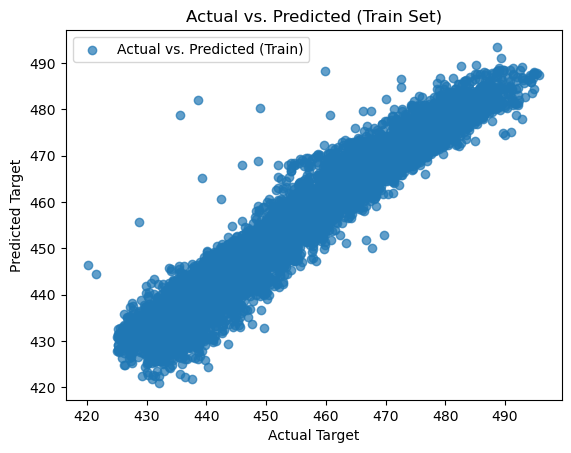

In [11]:
plt.scatter(Y_train, LRTrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

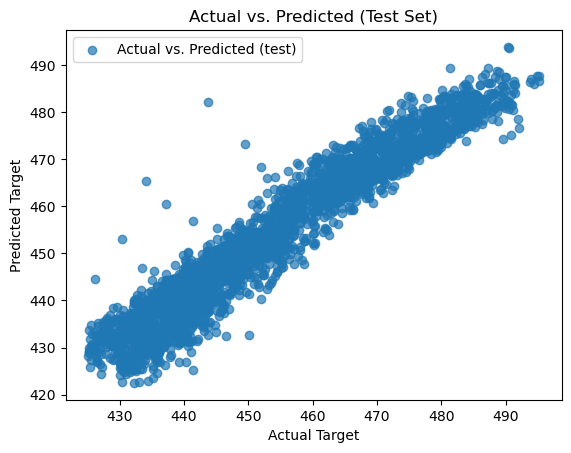

In [12]:
plt.scatter(Y_test, LRTest_pred, label='Actual vs. Predicted (test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
RD = Ridge()
RD.fit(X_train,Y_train)

Ridge()

In [14]:
RDTrain_pred = RD.predict(X_train)
RDTest_pred = RD.predict(X_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

RDTrain_R2 = r2_score(Y_train, RDTrain_pred)
RDTest_R2 = r2_score(Y_test, RDTest_pred)

RDTrain_mse = mean_squared_error(Y_train, RDTrain_pred)
RDTest_mse = mean_squared_error(Y_test, RDTest_pred)

RDTrain_rmse = mean_squared_error(Y_train, RDTrain_pred, squared=False)
RDTest_rmse = mean_squared_error(Y_test, RDTest_pred, squared=False)


print(f"RDTrain_R2: {(RDTrain_R2).round(2)}\n RDTest_R2: {RDTest_R2.round(2)}\n")
print(f"RDTrain_mse: {(RDTrain_mse).round(2)}\n RDTest_mse: {RDTest_mse.round(2)}\n")
print(f"RDTrain_rmse: {(RDTrain_rmse).round(2)}\n RDTest_rmse: {RDTest_rmse.round(2)}\n")

RDTrain_R2: 0.93
 RDTest_R2: 0.93

RDTrain_mse: 21.04
 RDTest_mse: 20.4

RDTrain_rmse: 4.59
 RDTest_rmse: 4.52



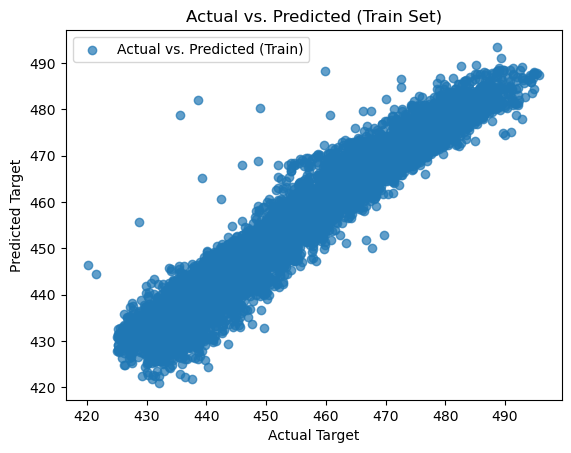

In [16]:
plt.scatter(Y_train, RDTrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

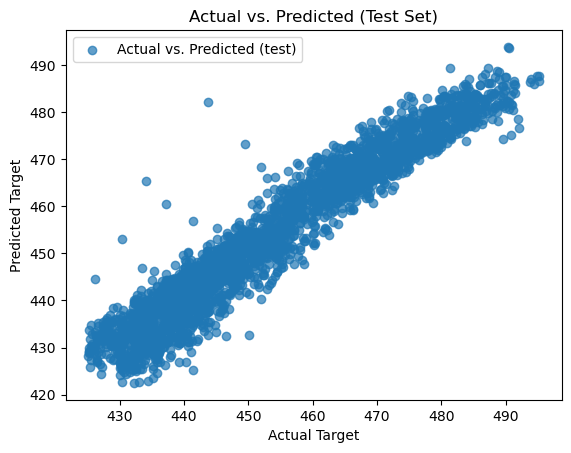

In [17]:
plt.scatter(Y_test, RDTest_pred, label='Actual vs. Predicted (test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
LA = Lasso()
LA.fit(X_train,Y_train)

Lasso()

In [19]:
LATrain_pred = LA.predict(X_train)
LATest_pred = LA.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

LATrain_R2 = r2_score(Y_train, LATrain_pred)
LATest_R2 = r2_score(Y_test, LATest_pred)

LATrain_mse = mean_squared_error(Y_train, LATrain_pred)
LATest_mse = mean_squared_error(Y_test, LATest_pred)

LATrain_rmse = mean_squared_error(Y_train, LATrain_pred, squared=False)
LATest_rmse = mean_squared_error(Y_test, LATest_pred, squared=False)


print(f"LATrain_R2: {(LATrain_R2).round(2)}\n LATest_R2: {LATest_R2.round(2)}\n")
print(f"LATrain_mse: {(LATrain_mse).round(2)}\n LATest_mse: {LATest_mse.round(2)}\n")
print(f"LATrain_rmse: {(LATrain_rmse).round(2)}\n LATest_rmse: {LATest_rmse.round(2)}\n")


LATrain_R2: 0.93
 LATest_R2: 0.93

LATrain_mse: 21.11
 LATest_mse: 20.45

LATrain_rmse: 4.59
 LATest_rmse: 4.52



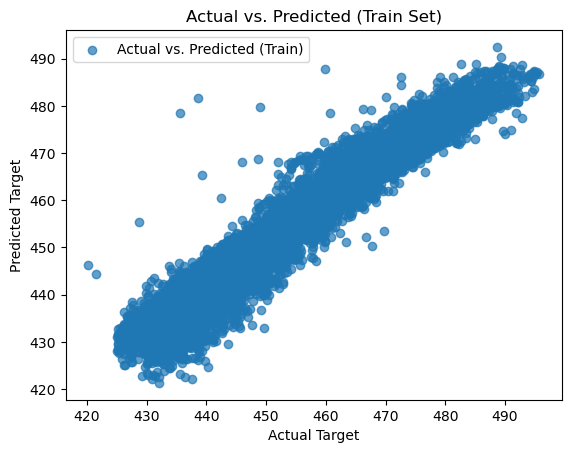

In [20]:
plt.scatter(Y_train, LATrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

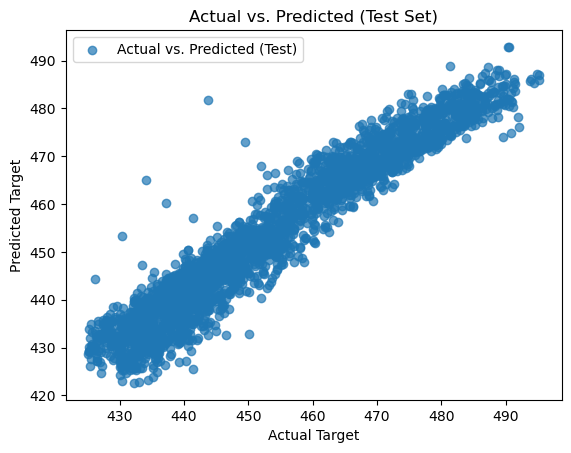

In [21]:
plt.scatter(Y_test, LATest_pred, label='Actual vs. Predicted (Test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# Support Vector Regression

In [22]:
from sklearn.svm import SVR

svm_model = SVR(kernel='linear') 
svm_model.fit(X_train, Y_train)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [23]:
SVMTrain_pred = svm_model.predict(X_train)
SVMTest_pred = svm_model.predict(X_test)

SVMTrain_R2 = r2_score(Y_train, SVMTrain_pred)
SVMTest_R2 = r2_score(Y_test, SVMTest_pred)

SVMTrain_mse = mean_squared_error(Y_train, SVMTrain_pred)
SVMTest_mse = mean_squared_error(Y_test, SVMTest_pred)

SVMTrain_rmse = mean_squared_error(Y_train, SVMTrain_pred, squared=False)
SVMTest_rmse = mean_squared_error(Y_test, SVMTest_pred, squared=False)

print(f"SVMTrain_R2: {(SVMTrain_R2).round(2)}\n SVMTest_R2: {SVMTest_R2.round(2)}\n")
print(f"SVMTrain_mse: {(SVMTrain_mse).round(2)}\n SVMTest_mse: {SVMTest_mse.round(2)}\n")
print(f"SVMTrain_rmse: {(SVMTrain_rmse).round(2)}\n SVMTest_rmse: {SVMTest_rmse.round(2)}\n")

SVMTrain_R2: 0.93
 SVMTest_R2: 0.93

SVMTrain_mse: 21.17
 SVMTest_mse: 20.56

SVMTrain_rmse: 4.6
 SVMTest_rmse: 4.53



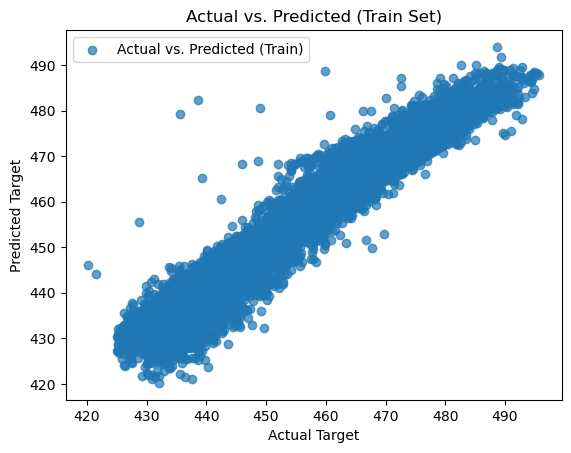

In [24]:
plt.scatter(Y_train, SVMTrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

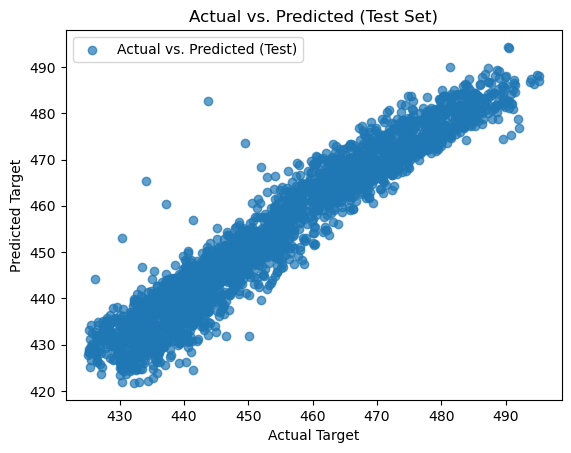

In [25]:
plt.scatter(Y_test, SVMTest_pred, label='Actual vs. Predicted (Test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# Decision Tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth = 5)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5)

In [27]:
DTTrain_pred = DT.predict(X_train)
DTTest_pred = DT.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

DTTrain_R2 = r2_score(Y_train, DTTrain_pred)
DTTest_R2 = r2_score(Y_test, DTTest_pred)

DTTrain_mse = mean_squared_error(Y_train, DTTrain_pred)
DTTest_mse = mean_squared_error(Y_test, DTTest_pred)

DTTrain_rmse = mean_squared_error(Y_train, DTTrain_pred, squared=False)
DTTest_rmse = mean_squared_error(Y_test, DTTest_pred, squared=False)


print(f"DTTrain_R2: {(DTTrain_R2).round(2)}\n DTTest_R2: {DTTest_R2.round(2)}\n")
print(f"DTTrain_mse: {(DTTrain_mse).round(2)}\n DTTest_mse: {DTTest_mse.round(2)}\n")
print(f"DTTrain_rmse: {(DTTrain_rmse).round(2)}\n DTTest_rmse: {DTTest_rmse.round(2)}\n")

DTTrain_R2: 0.94
 DTTest_R2: 0.93

DTTrain_mse: 18.3
 DTTest_mse: 19.03

DTTrain_rmse: 4.28
 DTTest_rmse: 4.36



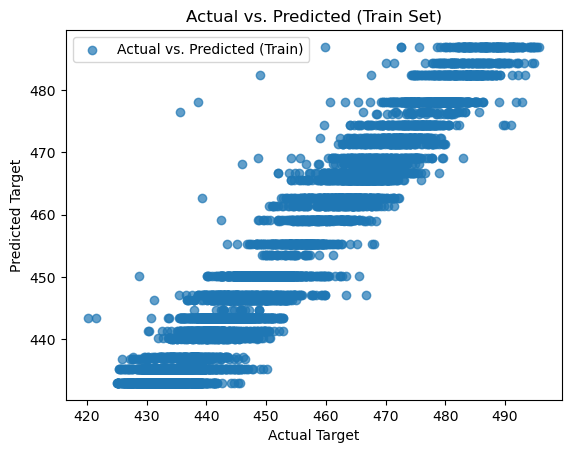

In [28]:
plt.scatter(Y_train, DTTrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

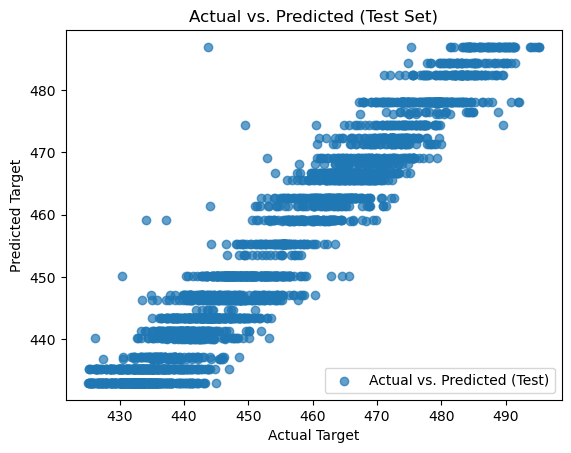

In [29]:
plt.scatter(Y_test, DTTest_pred, label='Actual vs. Predicted (Test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# Bagging

In [30]:
from sklearn.ensemble import BaggingRegressor
Bag = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth = 5), 
                       n_estimators = 300,
                       max_samples = 0.25,
                       bootstrap = False)

Bag.fit(X_train,Y_train)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                 bootstrap=False, max_samples=0.25, n_estimators=300)

In [31]:
BagTrain_pred = Bag.predict(X_train)
BagTest_pred = Bag.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

BagTrain_R2 = r2_score(Y_train, BagTrain_pred)
BagTest_R2 = r2_score(Y_test, BagTest_pred)

BagTrain_mse = mean_squared_error(Y_train, BagTrain_pred)
BagTest_mse = mean_squared_error(Y_test, BagTest_pred)

BagTrain_rmse = mean_squared_error(Y_train, BagTrain_pred, squared=False)
BagTest_rmse = mean_squared_error(Y_test, BagTest_pred, squared=False)


print(f"BagTrain_R2: {(BagTrain_R2).round(2)}\n BagTest_R2: {BagTest_R2.round(2)}\n")
print(f"BagTrain_mse: {(BagTrain_mse).round(2)}\n BagTest_mse: {BagTest_mse.round(2)}\n")
print(f"BagTrain_rmse: {(BagTrain_rmse).round(2)}\n BagTest_rmse: {BagTest_rmse.round(2)}\n")

BagTrain_R2: 0.94
 BagTest_R2: 0.94

BagTrain_mse: 16.28
 BagTest_mse: 16.75

BagTrain_rmse: 4.03
 BagTest_rmse: 4.09



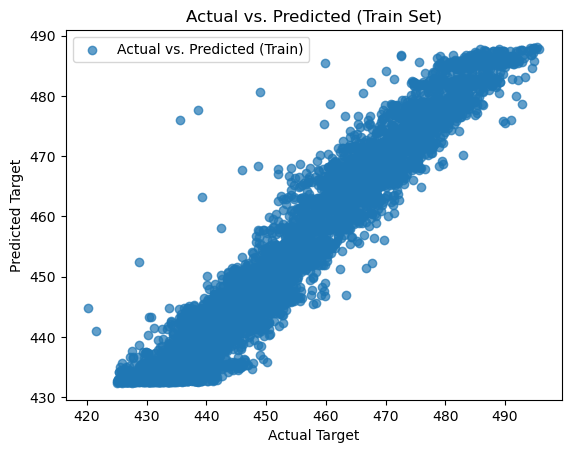

In [32]:
plt.scatter(Y_train, BagTrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

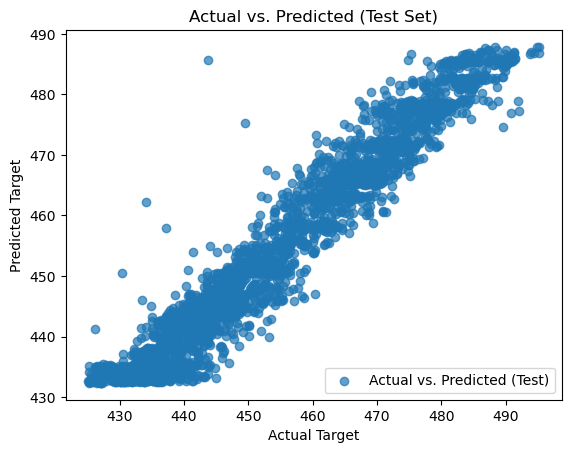

In [33]:
plt.scatter(Y_test, BagTest_pred, label='Actual vs. Predicted (Test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 300,
                             max_features = 0.25,
                             max_samples = 0.25,
                             )

RFR.fit(X_train,Y_train)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=0.25, max_samples=0.25, n_estimators=300)

In [35]:
RFRTrain_pred = RFR.predict(X_train)
RFRTest_pred = RFR.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

RFRTrain_R2 = r2_score(Y_train, RFRTrain_pred)
RFRTest_R2 = r2_score(Y_test, RFRTest_pred)

RFRTrain_mse = mean_squared_error(Y_train, RFRTrain_pred)
RFRTest_mse = mean_squared_error(Y_test, RFRTest_pred)

RFRTrain_rmse = mean_squared_error(Y_train, RFRTrain_pred, squared=False)

RFRTest_rmse = mean_squared_error(Y_test, RFRTest_pred, squared=False)


print(f"RFRTrain_R2: {(RFRTrain_R2).round(2)}\n RFRTest_R2: {RFRTest_R2.round(2)}\n")
print(f"RFRTrain_mse: {(RFRTrain_mse).round(2)}\n RFRTest_mse: {RFRTest_mse.round(2)}\n")
print(f"RFRTrain_rmse: {(RFRTrain_rmse).round(2)}\n RFRTest_rmse: {RFRTest_rmse.round(2)}\n")

RFRTrain_R2: 0.97
 RFRTest_R2: 0.95

RFRTrain_mse: 8.34
 RFRTest_mse: 13.77

RFRTrain_rmse: 2.89
 RFRTest_rmse: 3.71



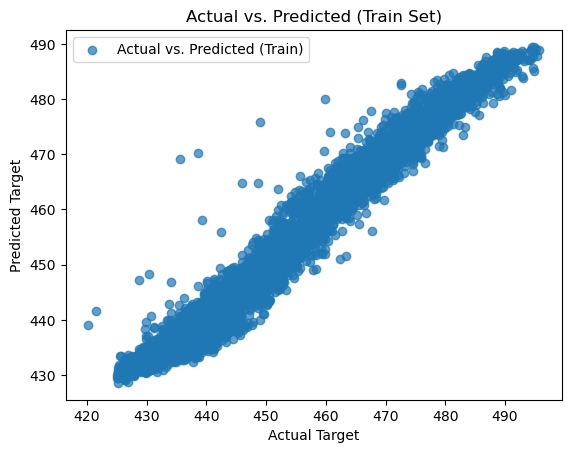

In [36]:
plt.scatter(Y_train, RFRTrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

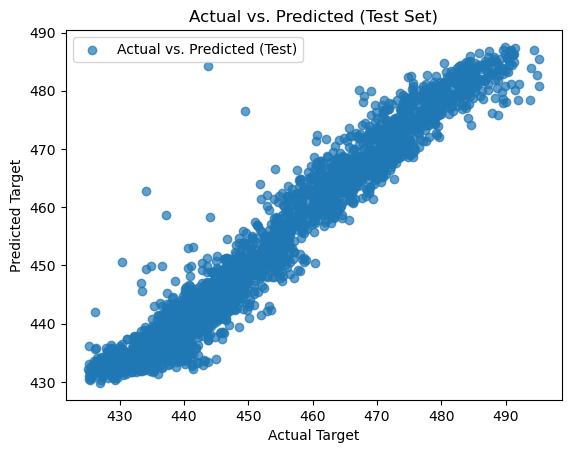

In [37]:
plt.scatter(Y_test, RFRTest_pred, label='Actual vs. Predicted (Test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# xgboost Regressor

In [38]:
import xgboost as xgb

xgb = xgb.XGBRegressor(n_estimators=100,
                                 learning_rate=0.1,
                                 subsample=0.7,
                                 colsample_bytree=0.7,)

xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
xgbTrain_pred = xgb.predict(X_train)
xgbTest_pred = xgb.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

xgbTrain_R2 = r2_score(Y_train, xgbTrain_pred)
xgbTest_R2 = r2_score(Y_test, xgbTest_pred)

xgbTrain_mse = mean_squared_error(Y_train, xgbTrain_pred)
xgbTest_mse = mean_squared_error(Y_test, xgbTest_pred)

xgbTrain_rmse = mean_squared_error(Y_train, xgbTrain_pred, squared=False)

xgbTest_rmse = mean_squared_error(Y_test, xgbTest_pred, squared=False)


print(f"xgbTrain_R2: {(xgbTrain_R2).round(2)}\n RFRTest_R2: {xgbTest_R2.round(2)}\n")
print(f"xgbTrain_mse: {(xgbTrain_mse).round(2)}\n RFRTest_mse: {xgbTest_mse.round(2)}\n")
print(f"xgbTrain_rmse: {(xgbTrain_rmse).round(2)}\n RFRTest_rmse: {xgbTest_rmse.round(2)}")

xgbTrain_R2: 0.97
 RFRTest_R2: 0.96

xgbTrain_mse: 9.32
 RFRTest_mse: 12.96

xgbTrain_rmse: 3.05
 RFRTest_rmse: 3.6


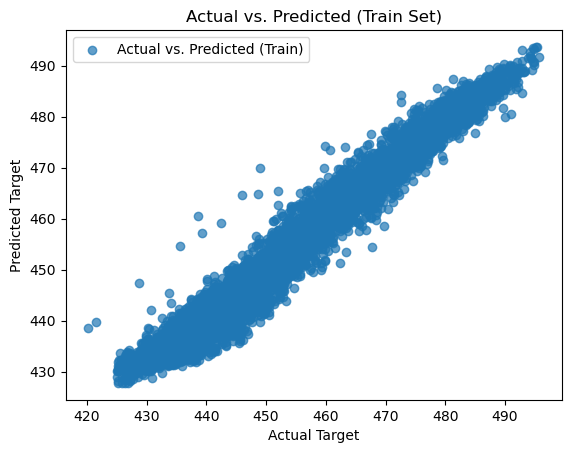

In [40]:
plt.scatter(Y_train, xgbTrain_pred, label='Actual vs. Predicted (Train)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Train Set)')
plt.legend()

plt.show()

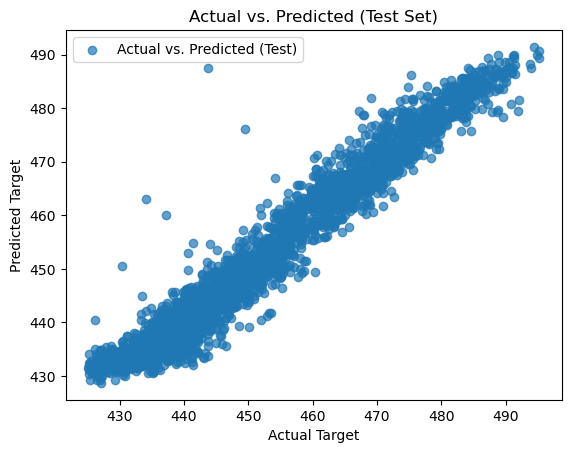

In [41]:
plt.scatter(Y_test, xgbTest_pred, label='Actual vs. Predicted (Test)', alpha=0.7)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()

plt.show()

# Evaluation

In [42]:
(xgbTrain_R2).round(2), (RFRTrain_R2).round(2)

(0.97, 0.97)

In [43]:
Evaluation = {
    "Models": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Decision Tree Regression",
        "RandomForest Regression",
        "SVM Regression",
        "Bagging Regression",
        "xgboost Regression"
    ],
    "Train_R2(%)": [
        (LRTrain_R2).round(2),
        (RDTrain_R2).round(2),
        (LATrain_R2).round(2),
        (DTTrain_R2).round(2),
        (RFRTrain_R2).round(2),
        (SVMTrain_R2).round(2),
        (BagTrain_R2).round(2),
        (xgbTrain_R2).round(2),
    ],
    "Test_R2(%)": [
        (LRTest_R2).round(2),
        (RDTest_R2).round(2),
        (LATest_R2).round(2),
        (DTTest_R2).round(2),
        (RFRTest_R2).round(2),
        (SVMTest_R2).round(2),
        (BagTest_R2).round(2),
        (xgbTest_R2).round(2),
    ],
    "Train_mean_squared_error(%)": [
        (LRTrain_mse).round(2),
        (RDTrain_mse).round(2),
        (LATrain_mse).round(2),
        (DTTrain_mse).round(2),
        (RFRTrain_mse).round(2),
        (SVMTrain_mse).round(2),
        (BagTrain_mse).round(2),
        (xgbTrain_mse).round(2),
    ],
    "Test_mean_squared_error(%)": [
        (LRTest_mse).round(2),
        (RDTest_mse).round(2),
        (LATest_mse).round(2),
        (DTTest_mse).round(2),
        (RFRTest_mse).round(2),
        (SVMTest_mse).round(2),
        (BagTest_mse).round(2),
        (xgbTest_mse).round(2),
    ],
    "Train_Root_mean_squared_error(%)": [
        (LRTrain_rmse).round(2),
        (RDTrain_rmse).round(2),
        (LATrain_rmse).round(2),
        (DTTrain_rmse).round(2),
        (RFRTrain_rmse).round(2),
        (SVMTrain_rmse).round(2),
        (BagTrain_rmse).round(2),
        (xgbTrain_rmse).round(2),
    ],
    "Test_Root_mean_squared_error(%)": [
        (LRTest_rmse).round(2),
        (RDTest_rmse).round(2),
        (LATest_rmse).round(2),
        (DTTest_rmse).round(2),
        (RFRTest_rmse).round(2),
        (SVMTest_rmse).round(2),
        (BagTest_rmse).round(2),
        (xgbTest_rmse).round(2),
    ]
}

Table = pd.DataFrame(Evaluation)

In [44]:
Table

,Models,Train_R2(%),Test_R2(%),Train_mean_squared_error(%),Test_mean_squared_error(%),Train_Root_mean_squared_error(%),Test_Root_mean_squared_error(%)
0,Linear Regression,0.93,0.93,21.04,20.40,4.59,4.52
1,Ridge Regression,0.93,0.93,21.04,20.40,4.59,4.52
2,Lasso Regression,0.93,0.93,21.11,20.45,4.59,4.52
3,Decision Tree Regression,0.94,0.93,18.30,19.03,4.28,4.36
4,RandomForest Regression,0.97,0.95,8.34,13.77,2.89,3.71
5,SVM Regression,0.93,0.93,21.17,20.56,4.60,4.53
6,Bagging Regression,0.94,0.94,16.28,16.75,4.03,4.09
7,xgboost Regression,0.97,0.96,9.32,12.96,3.05,3.60


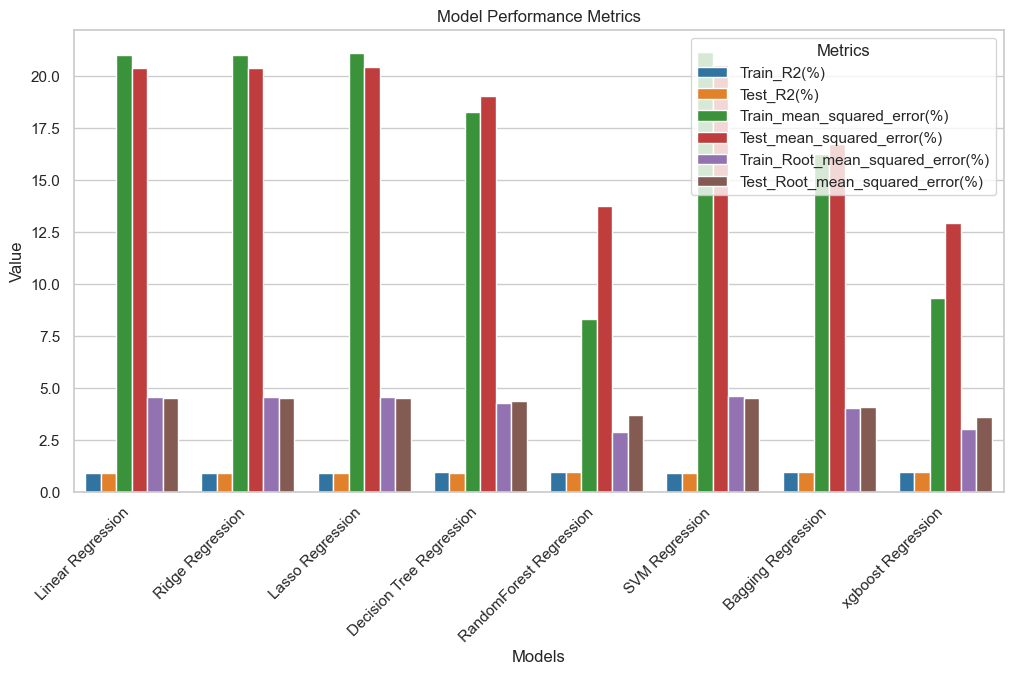

In [45]:
import seaborn as sns

melted_df = pd.melt(Table, id_vars='Models', var_name='Metric', value_name='Value')

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='Models', y='Value', hue='Metric', data=melted_df,palette=custom_palette)

plt.title('Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', loc='upper right')

plt.show()


In [46]:
melted_df

,Models,Metric,Value
0,Linear Regression,Train_R2(%),0.93
1,Ridge Regression,Train_R2(%),0.93
2,Lasso Regression,Train_R2(%),0.93
3,Decision Tree Regression,Train_R2(%),0.94
4,RandomForest Regression,Train_R2(%),0.97
5,SVM Regression,Train_R2(%),0.93
6,Bagging Regression,Train_R2(%),0.94
7,xgboost Regression,Train_R2(%),0.97
8,Linear Regression,Test_R2(%),0.93
9,Ridge Regression,Test_R2(%),0.93


In [120]:
result = LR.predict([[30.44,56.24,1005.19,56.24]])
print(result)

[[434.67636547]]


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Pickle File

In [123]:
import pickle

file_name = open('RFRegressor.pkl','wb')
pickle.dump(RFR, file_name)
file_name.close()

In [139]:
df['r_humidity'].min()

31.15